    user_id  gender  age  estimated_salary  purchased
0  15624510       1   19             19000          0
1  15810944       1   35             20000          0
2  15668575       0   26             43000          0
3  15603246       0   27             57000          0
4  15804002       1   19             76000          0
Confusion Matrix:
[[57  1]
 [ 6 16]]
Accuracy: 0.91


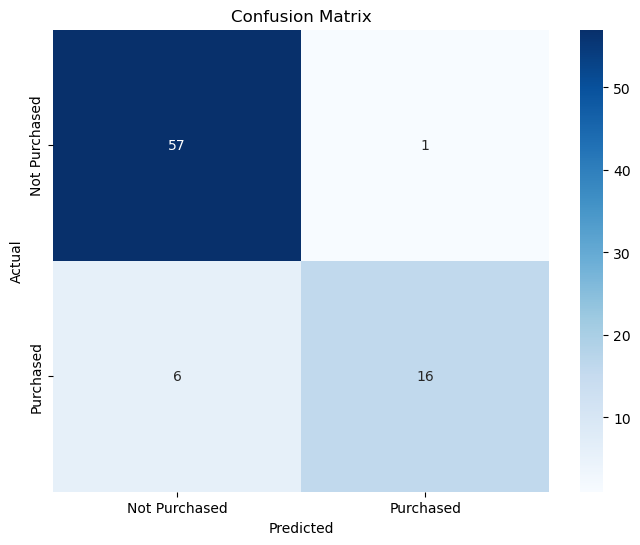

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


#Avoid Complication
# https://colab.research.google.com/drive/1hRoOy9fDLL6Gt0fL40phhDdmuipp5p8I?usp=sharing

# Load the dataset
data = pd.read_csv('user-data.csv')

# Handle categorical variables
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# data structured
print(data.head())

# Extract features and target variable
X = data.drop(['user_id','purchased'], axis=1).values  # Features
y = data['purchased'].values                 # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Evaluate the model using confusion matrix and accuracy
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(cm)
print(f'Accuracy: {accuracy:.2f}')

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()